### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reading train and test datasets

In [3]:
train_df = pd.read_csv(r"train.csv",index_col=0)
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [4]:
test_df = pd.read_csv(r"test.csv",index_col=0)
test_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### shape of the Dataset

In [5]:
print("No. of rows: ", train_df.shape[0])
print("No. of columns: ", train_df.shape[1])

No. of rows:  8693
No. of columns:  13


#### The training dataset contains 8693 rows and 13 columns.

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


# Performing EDA and Data cleaning

In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


##### It show the summary of our train data set mean and std as Standard deviation is far for the mean so there is presence of outliers or any un usual activity is in the dataset

In [8]:
numerical_data = train_df.select_dtypes(include='float64')
num_cols = numerical_data.columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [9]:
categorical_data = train_df.select_dtypes(exclude='number')
cat_cols = categorical_data.columns
print("Categorical columns: ", cat_cols)

Categorical columns:  Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name',
       'Transported'],
      dtype='object')


# Graphical representation of train data

## Graphical analysis(Barplot)  of categorical data

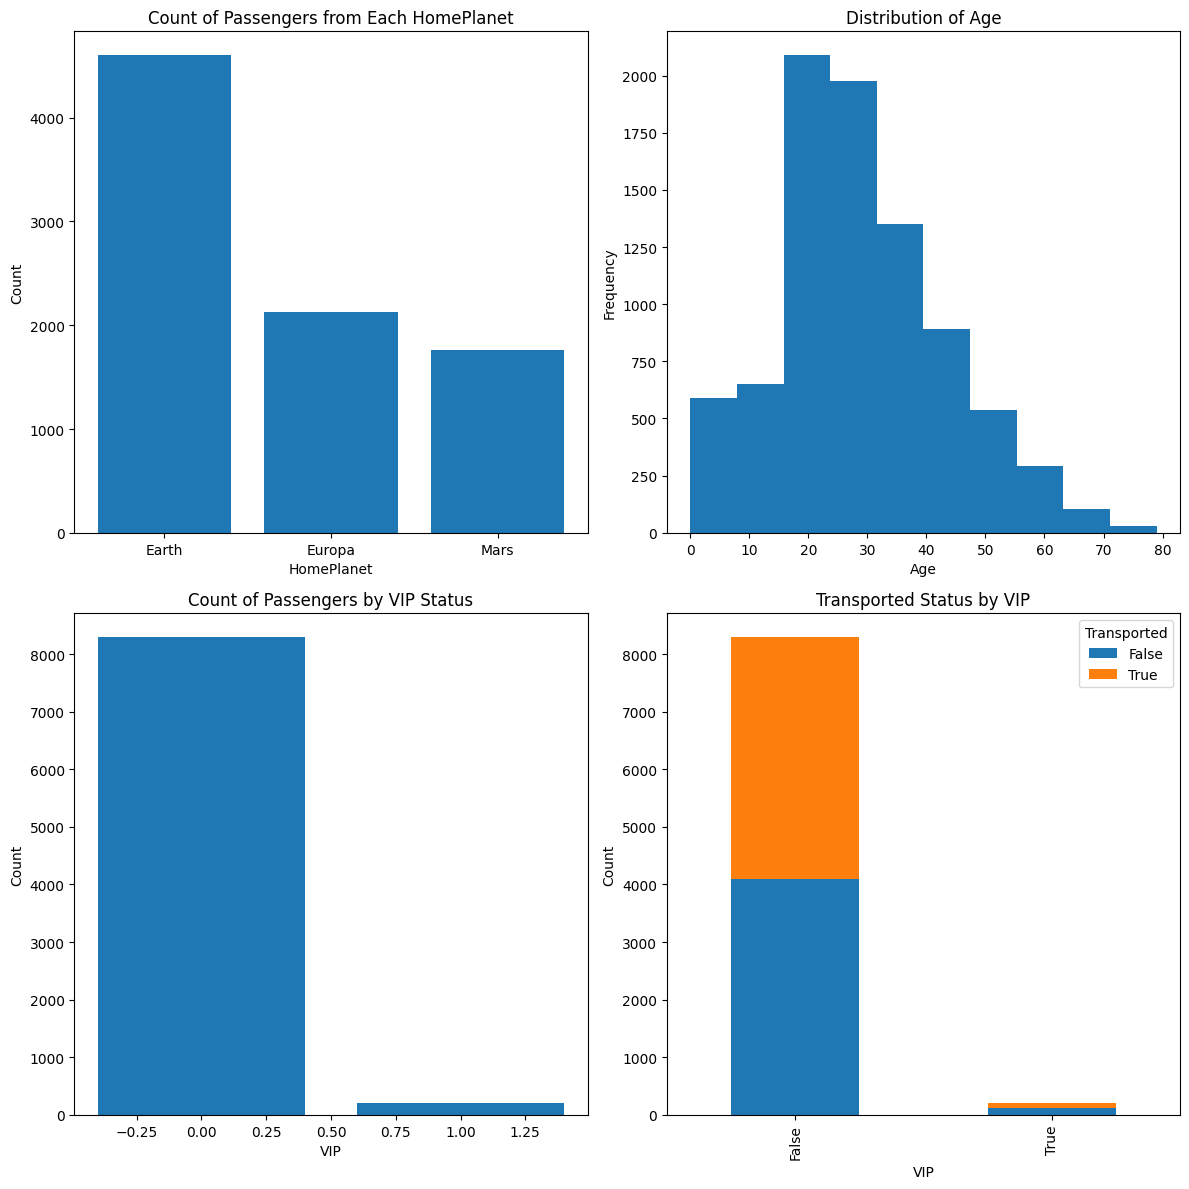

In [10]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Count of passengers from each HomePlanet
axes[0, 0].bar(train_df['HomePlanet'].value_counts().index, train_df['HomePlanet'].value_counts())
axes[0, 0].set_title('Count of Passengers from Each HomePlanet')
axes[0, 0].set_xlabel('HomePlanet')
axes[0, 0].set_ylabel('Count')

# Histogram Distribution of Age
axes[0, 1].hist(train_df['Age'], bins=10)
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Count of passengers for each VIP status
axes[1, 0].bar(train_df['VIP'].value_counts().index, train_df['VIP'].value_counts())
axes[1, 0].set_title('Count of Passengers by VIP Status')
axes[1, 0].set_xlabel('VIP')
axes[1, 0].set_ylabel('Count')

# Distribution of Transported status by VIP
transported_by_vip = train_df.groupby('VIP')['Transported'].value_counts().unstack()
transported_by_vip.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Transported Status by VIP')
axes[1, 1].set_xlabel('VIP')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Transported', loc='upper right')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()
